<a href="https://colab.research.google.com/github/EDC21/Deep-Learning/blob/master/Coursera-Tensorflow%20Developer/Chapter1-Intro%20to%20DL/Week%203/Week_3_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.2 What are convolutions and poolings 

 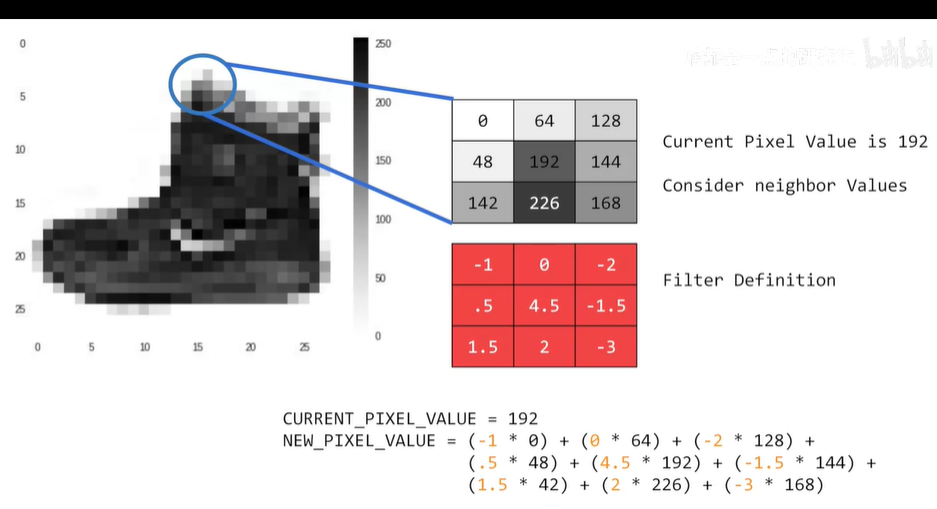

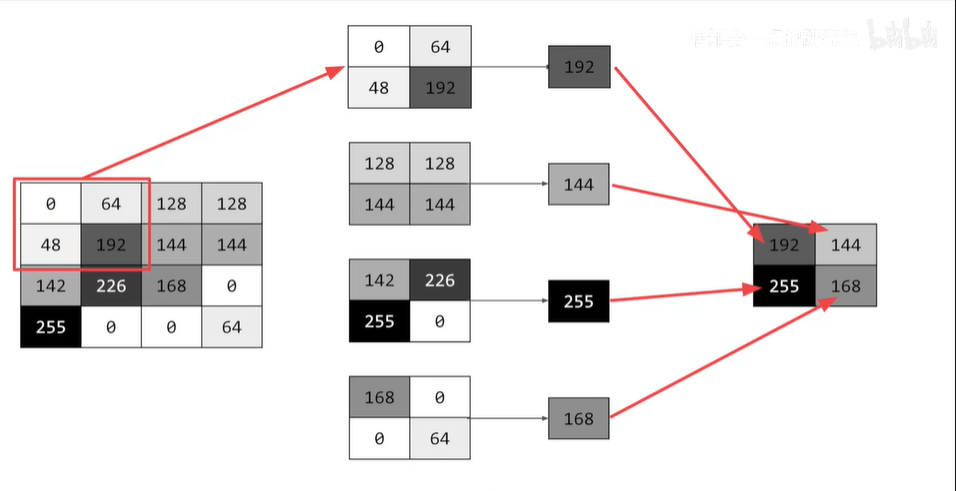

#3.3 Implementing Convolutional Layers  
#3.4 Implementing Pooling Layers

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
#Common ANN
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    
])

In [4]:
keras.backend.clear_session()

In [6]:
#add convolutional layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', #generate 64 3x3 filters
            input_shape=(28, 28, 1)), #'1' means we are tallying using a single byte for color depth
  tf.keras.layers.MaxPooling2D(2,2), # for every 4 pixels, the biggest survive
  tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Due to there is no padding, the output shape is 26x26 (n-f+1),rater than 28x28 

#3.5 Improving the Fashion Classifier with convolutions  
Full project:[連結文字](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%202%20-%20Notebook.ipynb#scrollTo=C0tFgT1MMKi6)

In [8]:
# No Covolutional or Pooling layers

import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4949 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3739 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3355 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3114 - accuracy: 0.8853
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.8679


The accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better?

In [9]:
#Add Convolutional and Pooling layers

import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.3.0
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)         

It's likely gone up to about 93% on the training data and 91% on the validation data.

#3.6 Walking through convolutions  
Full project:[連結文字](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%203%20-%20Notebook.ipynb#scrollTo=kDHjf-ehaBqm)